# Diamond Price Predict

### - Importing Libraries and Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv",index_col = 0)


In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
cat_col = df.select_dtypes(exclude=np.number)
num_col = df.select_dtypes(include=np.number)

## Outliers And Missing Values

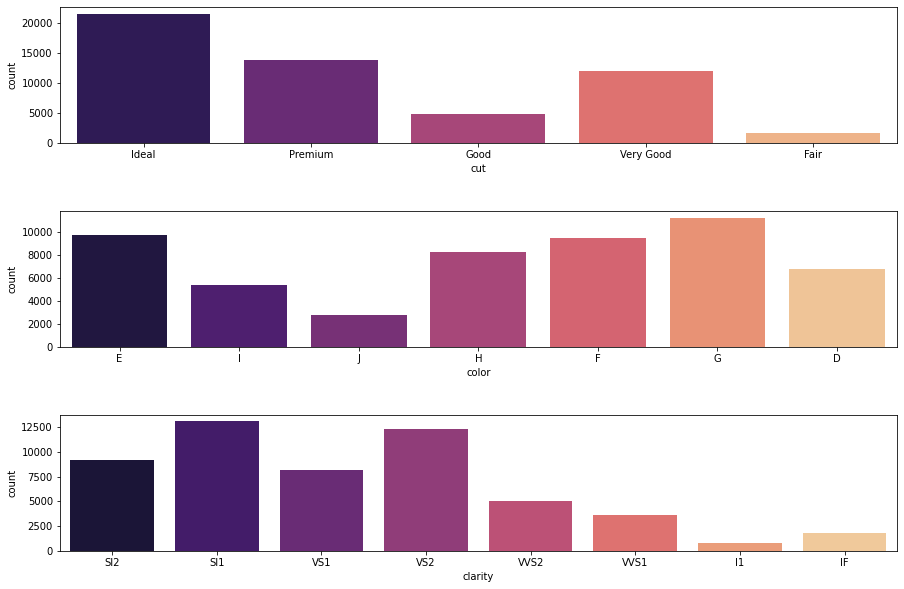

In [6]:
plt.figure(figsize=(15,10))

for index,col in enumerate(cat_col):
    plt.subplot(3,1,index+1)
    sns.countplot(data=df,x=col,palette="magma")
plt.subplots_adjust(wspace=0.5,hspace=0.5)
    

**Kategorik veriler arıyoruz. Bir değer baskın olabilirse, sütunlarını bırakabiliriz çünkü o sütun yararlı olmayacaktır**

In [7]:
num_col

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,59.8,62.0,2756,5.74,5.73,3.43


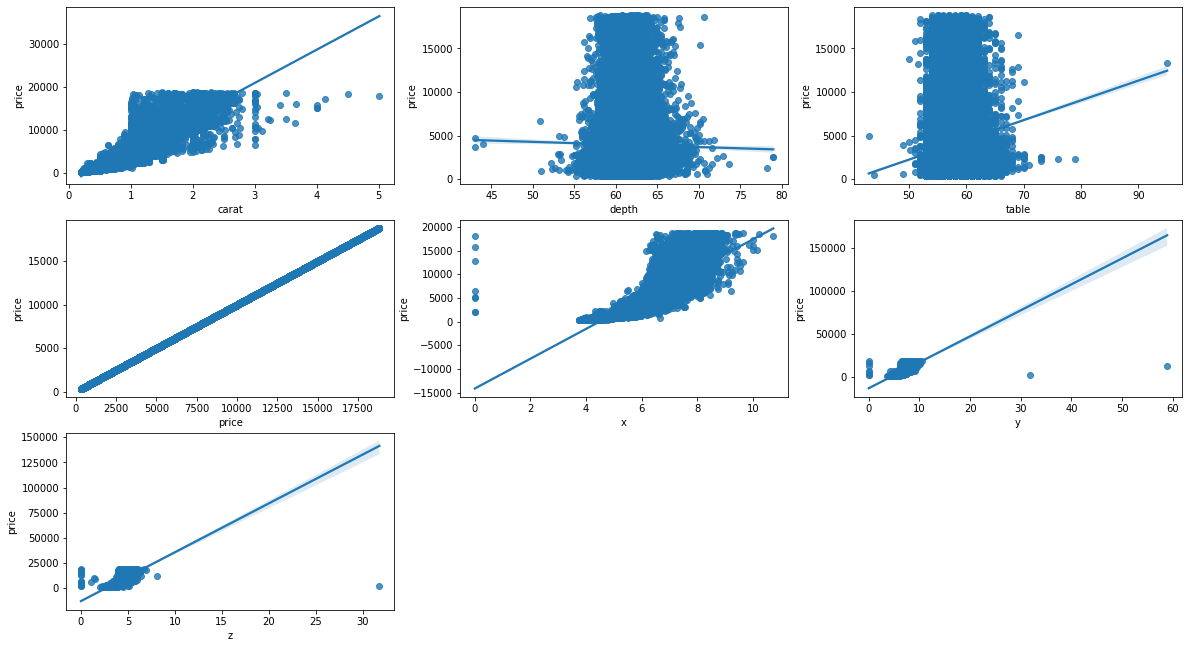

In [8]:
plt.figure(figsize=(20,15))

for index,col in enumerate(num_col):
    plt.subplot(4,3,index+1)
    sns.regplot(data=df,x=col,y=df.price)

**Her değer ve fiyat arasında doğrusal regresyon ilişkisi aradık**

# Exploratory Data Analysis

In [9]:
df2 = df.copy()

In [10]:
df2 = df2[df2.z < 30]

In [11]:
df2 = df2[df2.y < 30]
df2 = df2[df2.x >0.1]

In [12]:
df2


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


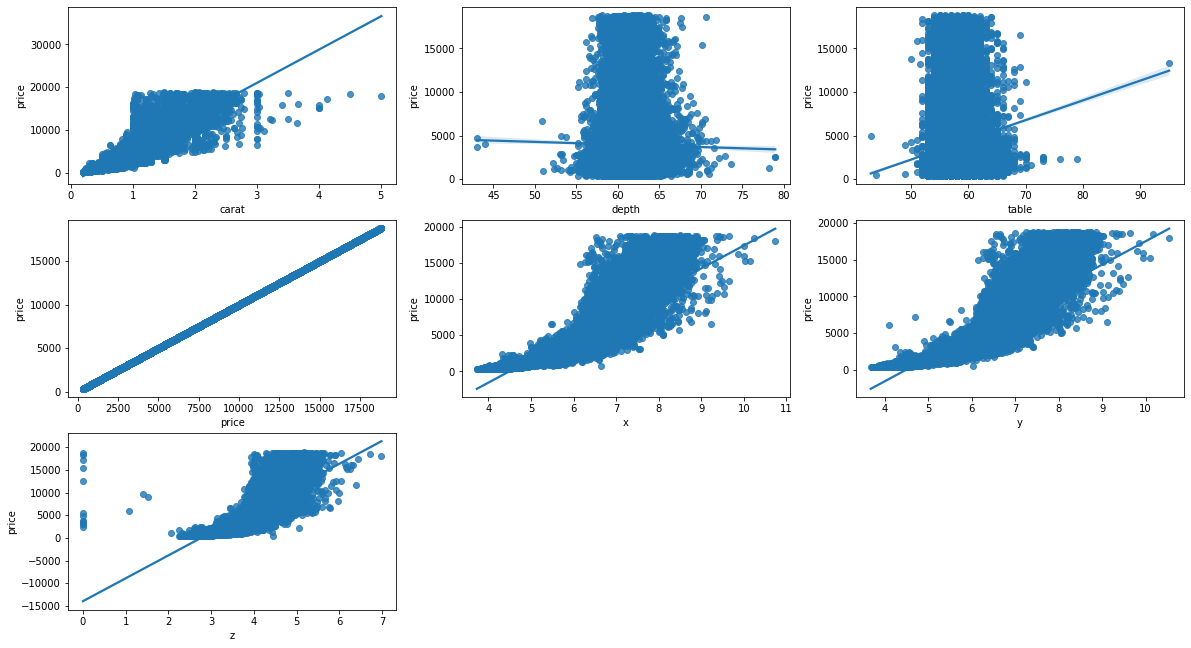

In [13]:
plt.figure(figsize=(20,15))

for index,col in enumerate(num_col):
    plt.subplot(4,3,index+1)
    sns.regplot(data=df2,x=col,y=df2.price)

**Çıkarım :**
- Regresyon grafiğimizden sonra aykırı değerleri düşürdük
 


<AxesSubplot:xlabel='price', ylabel='Count'>

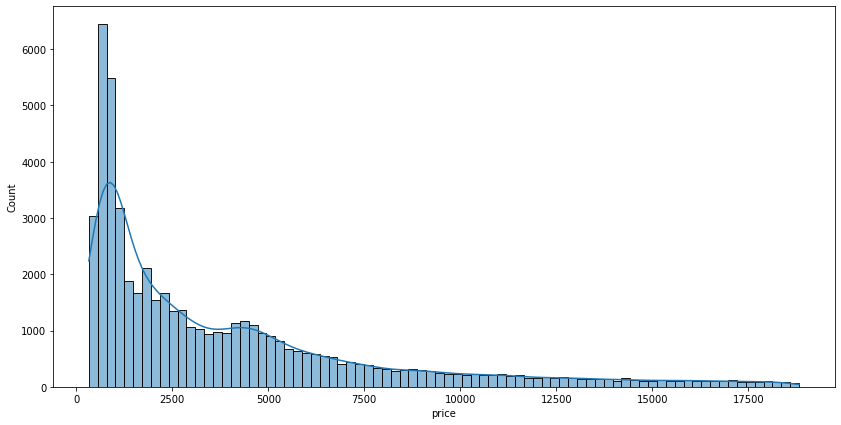

In [14]:
plt.figure(figsize=(14,7))
sns.histplot(data = df2,x=df2.price,palette = "rocket",kde=True)

In [15]:
df2.drop("depth",axis = 1,inplace = True)

**Doğrusal regresyona baktığımız için derinliği düşürdük.**

In [16]:
df2

,carat,cut,color,clarity,table,price,x,y,z
1,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,62.0,2756,5.74,5.73,3.43


In [17]:
df2.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [18]:
df2.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
df2.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

**Çıkarım :**
- Bu sütunlara benzersiz değerler baktık. Bir çok benzersiz değer bizi bilinmeyen bir duruma getiriyor.
 


# Correlation


In [20]:
correlation = df2.corr()

In [21]:
correlation[["price"]]

,price
carat,0.921604
table,0.127145
price,1.000000
x,0.887214
y,0.888810
z,0.877666


**Korelasyon, diğer sayısal değerler ile fiyat arasındaki doğrusal ilişkiyi değerlendirmemizi sağlar.**

In [22]:
X = df2.drop("price",axis = 1)
y = df2["price"]

In [23]:
numericCol = X.select_dtypes(include=np.number)

In [24]:
numericColumns = numericCol.columns

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

- Sayısal değerlerimiz benzer değil. Doğru hesaplamak için standart hale getirmemiz gerekiyor.

In [27]:
numericCol = scaler.fit_transform(numericCol)

In [28]:
numericCol


array([[-1.19814794, -1.09985875, -1.591617  , -1.5779206 , -1.59851444],
       [-1.24034645,  1.58577858, -1.64520721, -1.70388102, -1.77154234],
       [-1.19814794,  3.37620347, -1.5023    , -1.49694605, -1.77154234],
       ...,
       [-0.18538371, -1.09985875,  0.05181585,  0.00558178, -0.07010129],
       [-0.18538371,  2.0333848 ,  0.00715735, -0.0034154 , -0.15661524],
       [-0.20648296,  0.69056614, -0.01963775,  0.02357612, -0.09893928]])

In [29]:
numericCol = pd.DataFrame(numericCol,columns=[numericColumns])

In [30]:
X[numericColumns] = numericCol

In [31]:
X.isnull().sum()

carat      12
cut         0
color       0
clarity     0
table      12
x          12
y          12
z          12
dtype: int64

- fit_transform'dan sonra bazı değerler kayboldu. Tahmin için bu değerleri doldurmamız gerekiyordu.

In [32]:
X.carat.fillna(df.carat.mean(),inplace=True)

In [33]:
X.table.fillna(df.table.mean(),inplace=True)
X.x.fillna(df.x.mean(),inplace=True)
X.y.fillna(df.y.mean(),inplace=True)
X.z.fillna(df.z.mean(),inplace=True)


In [34]:
X

,carat,cut,color,clarity,table,x,y,z
1,-1.240346,Ideal,E,SI2,1.585779,-1.645207,-1.703881,-1.771542
2,-1.198148,Premium,E,SI1,3.376203,-1.502300,-1.496946,-1.771542
3,-1.071552,Good,E,VS1,0.242960,-1.368324,-1.352991,-1.310135
4,-1.029354,Premium,I,VS2,0.242960,-1.243281,-1.245025,-1.137107
5,-1.177049,Good,J,SI2,-0.204646,-1.600549,-1.595915,-1.526419
...,...,...,...,...,...,...,...,...
53939,0.797935,Premium,H,SI2,57.457251,5.731158,5.734526,3.538730
53940,0.797935,Ideal,D,SI2,57.457251,5.731158,5.734526,3.538730
53941,0.797935,Premium,E,SI1,57.457251,5.731158,5.734526,3.538730
53942,0.797935,Premium,F,SI1,57.457251,5.731158,5.734526,3.538730


In [35]:
cat_col = X.select_dtypes(exclude=np.number).columns

In [36]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [37]:
X = pd.get_dummies(X,columns=cat_col)

In [38]:
X

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.240346,1.585779,-1.645207,-1.703881,-1.771542,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.198148,3.376203,-1.502300,-1.496946,-1.771542,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.071552,0.242960,-1.368324,-1.352991,-1.310135,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.029354,0.242960,-1.243281,-1.245025,-1.137107,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
5,-1.177049,-0.204646,-1.600549,-1.595915,-1.526419,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53939,0.797935,57.457251,5.731158,5.734526,3.538730,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53940,0.797935,57.457251,5.731158,5.734526,3.538730,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
53941,0.797935,57.457251,5.731158,5.734526,3.538730,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53942,0.797935,57.457251,5.731158,5.734526,3.538730,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# ML 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y_pred)

0.8120219539648694

In [48]:
r2_score(y_test,y_pred) * 100

81.20219539648694